In [1]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
from pymanticore.swift_analysis import HBTData, SOAPData
from stacking_backend import ClusterAnalysisPipeline, BasicPlotter, SummaryPlotter, MassScalingPlotter
from stacking_backend.data import load_pr4_data, PatchExtractor
from pymanticore.cosmology import ra_dec_to_galactic
import h5py

# Initialize the analysis pipeline
pipeline = ClusterAnalysisPipeline()

# Create plotters
basic_plotter = BasicPlotter(pipeline.patch_extractor)
summary_plotter = SummaryPlotter()
mass_plotter = MassScalingPlotter()

🔍 LOADING PR4 NILC Y-MAP AND MASKS
Y-map columns: ('FULL', 'HALF-RING 1', 'HALF-RING 2')
NSIDE: 2048
Coordinate system: GALACTIC
Ordering: RING
Mask columns: ('NILC-MASK', 'GAL-MASK', 'PS-MASK')


In [2]:
# Define examples and plotting function
def plot_example_patches(examples, basic_plotter, patch_size_deg=8.0, npix=128):
    """Plot patches for a list of example coordinates"""
    for i, example in enumerate(examples):
        print(f"\n📊 Example {i+1}: {example['title']}")
        
        fig, (ax1, ax2), patch_data, mask_patch = basic_plotter.plot_patch(
            ra=example['ra'],
            dec=example['dec'],
            patch_size_deg=patch_size_deg,
            npix=npix,
            title=example['title'],
            show_center=True,
            show_grid=True
        )
        
        print(f"Patch shape: {patch_data.shape}")

# Example coordinates to plot
examples = [
    {'ra': 194.95, 'dec': 27.98, 'title': 'Coma Cluster'},
    {'ra': 186.69, 'dec': 12.83, 'title': 'Virgo Cluster'},
    {'ra': 23.40, 'dec': 30.66, 'title': 'Perseus Cluster'},
    {'ra': 120.0, 'dec': 0.0, 'title': 'Random Position'},
    {'ra': 168.1, 'dec':  40.45, 'title': "test"}
]


📊 Example 1: Coma Cluster


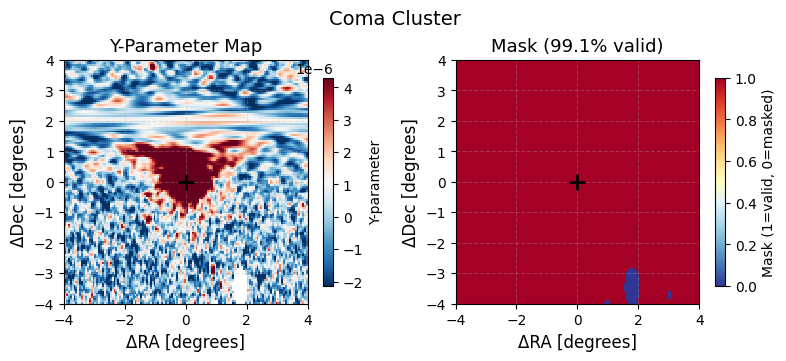

Patch shape: (128, 128)

📊 Example 2: Virgo Cluster


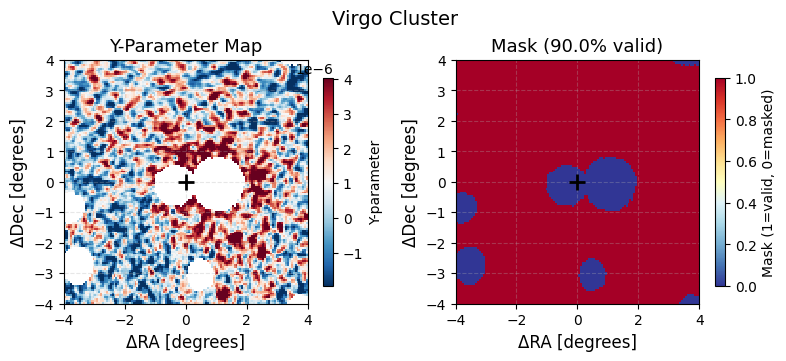

Patch shape: (128, 128)

📊 Example 3: Perseus Cluster


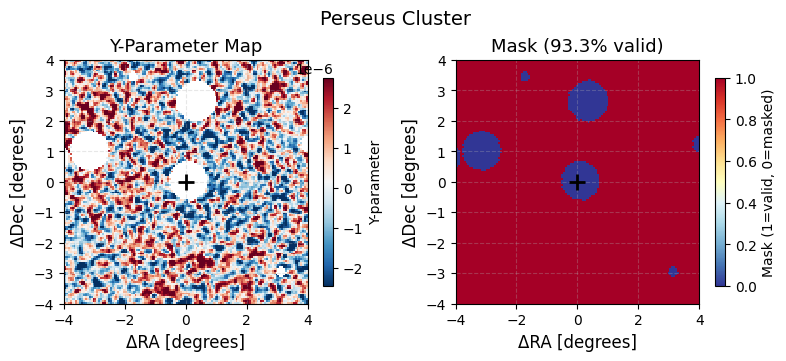

Patch shape: (128, 128)

📊 Example 4: Random Position


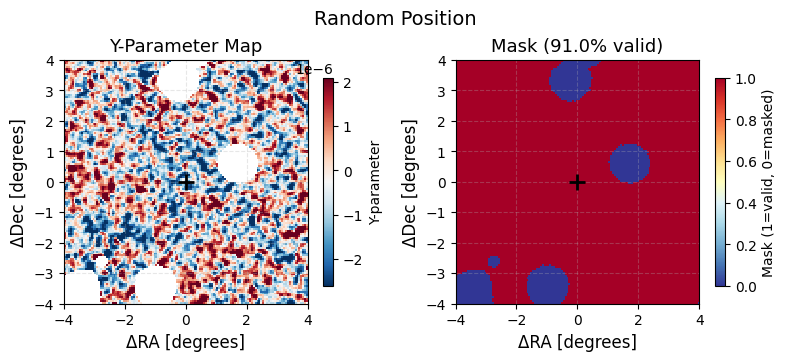

Patch shape: (128, 128)

📊 Example 5: test


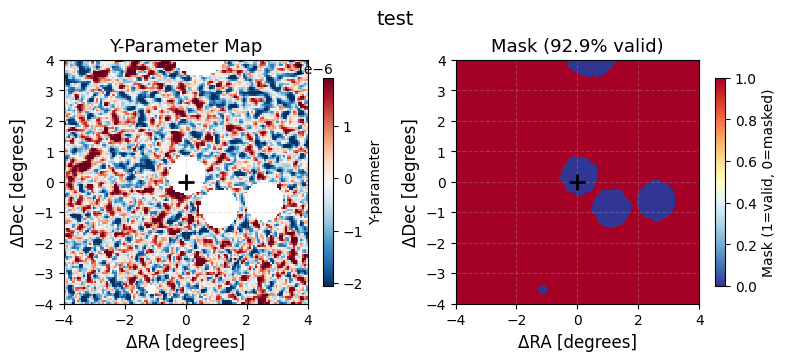

Patch shape: (128, 128)


In [3]:
# Plot the example patches
plot_example_patches(examples, basic_plotter)

### Load MCXC cluster catalog


Plotting 2 most massive MCXC clusters:

📊 Example 1: MCXC Most Massive #1 (M500=1.45e+15 M☉)


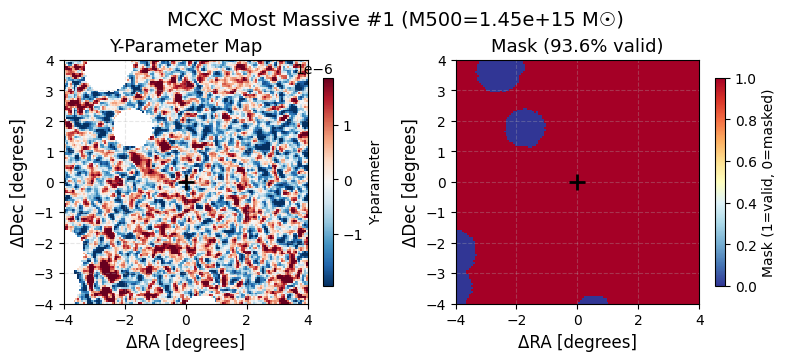

Patch shape: (128, 128)

📊 Example 2: MCXC Most Massive #2 (M500=1.44e+15 M☉)


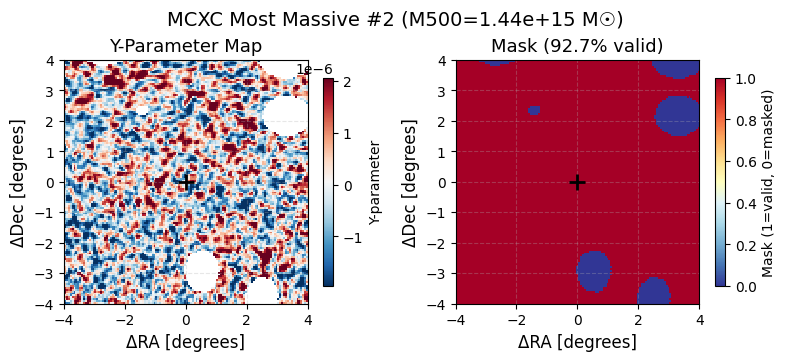

Patch shape: (128, 128)


In [4]:
# Load MCXC cluster catalog and plot 2 most massive
fname = "/cosma7/data/dp004/rttw52/Manticore/observational_data/mcxc_2_clusters/mcxc_clusters.hdf5"

with h5py.File(fname, "r") as f:
    _mcxc_data = f["all_clusters"][...]

_ra = np.degrees(_mcxc_data["phi"])
_dec = np.degrees(_mcxc_data["theta"])
gal_l, gal_b = ra_dec_to_galactic(_ra, _dec)
mcxc_data = {"gal_l": gal_l, "gal_b": gal_b, "z": _mcxc_data["z"], "m500": _mcxc_data["M500"]*1e14, "r500": _mcxc_data["R500"]}

# Find 2 most massive clusters and plot them
mass_indices = np.argsort(mcxc_data["m500"])[-2:][::-1]  # Get indices of 2 most massive, descending order

mcxc_massive_examples = []
for i, idx in enumerate(mass_indices):
    mcxc_massive_examples.append({
        'ra': _ra[idx],
        'dec': _dec[idx], 
        'title': f'MCXC Most Massive #{i+1} (M500={mcxc_data["m500"][idx]:.2e} M☉)'
    })

print(f"\nPlotting 2 most massive MCXC clusters:")
plot_example_patches(mcxc_massive_examples, basic_plotter)

### Load eROSITA cluster catalog


Plotting 2 most massive eROSITA clusters:

📊 Example 1: eROSITA Most Massive #1 (M500=1.00e+16 M☉)


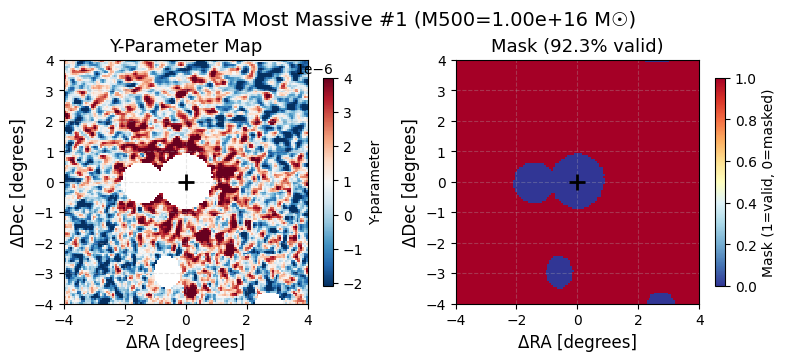

Patch shape: (128, 128)

📊 Example 2: eROSITA Most Massive #2 (M500=1.62e+15 M☉)


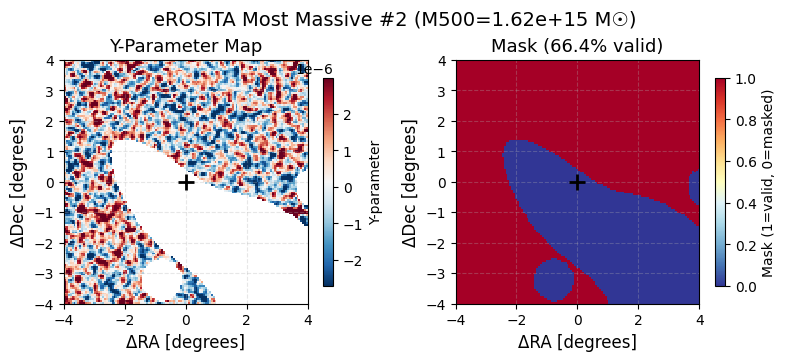

Patch shape: (128, 128)


In [5]:
# Load eROSITA cluster catalog and plot 2 most massive
fname = "/cosma7/data/dp004/rttw52/Manticore/observational_data/erosita_clusters/erosita_clusters.hdf5"

with h5py.File(fname, "r") as f:
    _eros_data = f["all_clusters"][...]

_ra = np.degrees(_eros_data["phi"])
_dec = np.degrees(_eros_data["theta"])
gal_l, gal_b = ra_dec_to_galactic(_ra,_dec)
eros_data = {"gal_l": gal_l, "gal_b": gal_b, "z": _eros_data["z"], "m500": _eros_data["M500"]*1e14, "r500": _eros_data["R500"]}

# Find 2 most massive clusters and plot them
mass_indices = np.argsort(eros_data["m500"])[-2:][::-1]  # Get indices of 2 most massive, descending order

eros_massive_examples = []
for i, idx in enumerate(mass_indices):
    eros_massive_examples.append({
        'ra': _ra[idx],
        'dec': _dec[idx],
        'title': f'eROSITA Most Massive #{i+1} (M500={eros_data["m500"][idx]:.2e} M☉)'
    })

print(f"\nPlotting 2 most massive eROSITA clusters:")
plot_example_patches(eros_massive_examples, basic_plotter)

## Load Manticore posterior clusters


Plotting 2 most massive Manticore clusters:

📊 Example 1: Manticore Most Massive #1 (M500=1.71e+15 M☉)


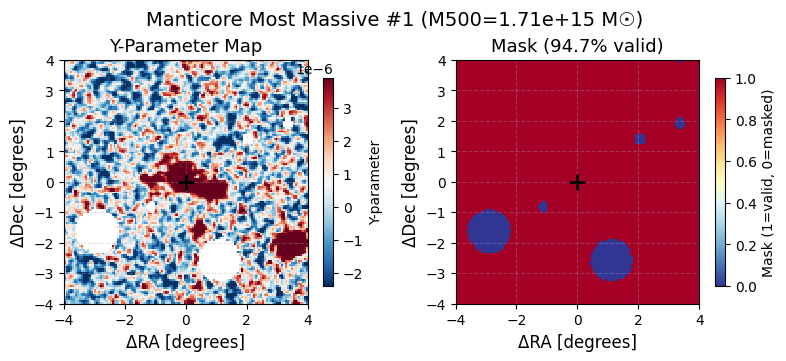

Patch shape: (128, 128)

📊 Example 2: Manticore Most Massive #2 (M500=1.41e+15 M☉)


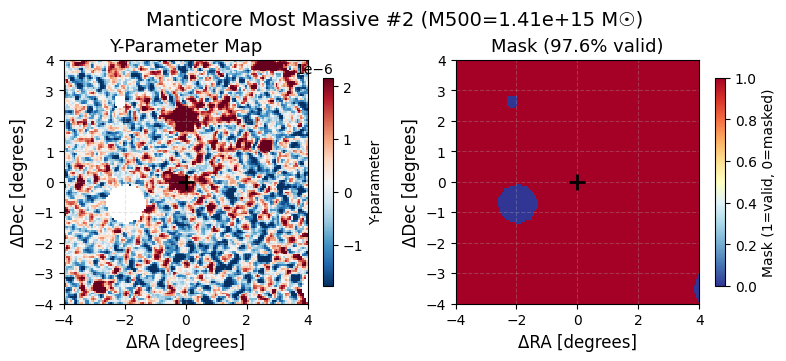

Patch shape: (128, 128)


In [6]:
# Load Manticore posterior clusters and plot 2 most massive
import numpy as np
import h5py
from astropy.cosmology import Planck18, z_at_value
import astropy.units as u

fname = "/cosma7/data/dp004/rttw52/Manticore/new_analysis/clusters/temp/output/simplified_clusters.h5"

with h5py.File(fname, "r") as f:
    distances_mpc = f["clusters/median_properties/dist"][...]
    
    # Convert comoving distance to redshift using Planck18 cosmology
    redshifts = []
    for dist in distances_mpc:
        z = z_at_value(Planck18.comoving_distance, dist * u.Mpc)
        redshifts.append(z)
    
    manticore_data = {"gal_l": f["clusters/median_properties/gal_l"][...],
                      "gal_b": f["clusters/median_properties/gal_b"][...],
                      "m500": f["clusters/median_properties/SO_500_crit_TotalMass"][...],
                      "r500": f["clusters/median_properties/SO_500_crit_SORadius"][...],
                      "dist": distances_mpc,
                      "z": np.array(redshifts),
                      "ra": f["clusters/median_properties/ra"][...],
                      "dec": f["clusters/median_properties/dec"][...]}

# Find 2 most massive clusters and plot them
mass_indices = np.argsort(manticore_data["m500"])[-2:][::-1]  # Get indices of 2 most massive, descending order

manticore_massive_examples = []
for i, idx in enumerate(mass_indices):
    # Convert galactic to RA/Dec
    coord = SkyCoord(l=manticore_data["gal_l"][idx]*u.deg, b=manticore_data["gal_b"][idx]*u.deg, frame='galactic')
    icrs_coord = coord.icrs
    
    manticore_massive_examples.append({
        'ra': manticore_data["ra"][idx],
        'dec': manticore_data["dec"][idx],
        'title': f'Manticore Most Massive #{i+1} (M500={manticore_data["m500"][idx]:.2e} M☉)'
    })

print(f"\nPlotting 2 most massive Manticore clusters:")
plot_example_patches(manticore_massive_examples, basic_plotter)

In [7]:
def plot_halo_overview(halo_data, z_min=None, z_max=None, figsize=(15, 10), cat_name=""):
    """
    Plot overview of cluster data.
    
    Parameters
    ----------
    halo_data : dict
        Dictionary containing cluster data with keys: 'gal_l', 'gal_b', 'z', 'm500', 'r500'
    z_min : float, optional
        Minimum redshift to include in plots
    z_max : float, optional
        Maximum redshift to include in plots
    figsize : tuple, optional
        Figure size (width, height)
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Apply redshift filter if specified
    if z_min is not None or z_max is not None:
        z_mask = np.ones(len(halo_data["z"]), dtype=bool)
        if z_min is not None:
            z_mask &= (halo_data["z"] >= z_min)
        if z_max is not None:
            z_mask &= (halo_data["z"] <= z_max)

        # Create filtered data
        filtered_data = {key: np.array(values)[z_mask] for key, values in halo_data.items()}
        title_suffix = f" (z: {z_min or 'min'} - {z_max or 'max'})"
    else:
        filtered_data = halo_data
        title_suffix = ""
    
    # Create figure with subplots
    fig, axes = plt.subplots(2, 3, figsize=figsize)
    fig.suptitle(f'{cat_name} Clusters Overview{title_suffix}', fontsize=16, fontweight='bold')

    # 1. Sky distribution in galactic coordinates
    ax1 = axes[0, 0]
    scatter = ax1.scatter(filtered_data["gal_l"], filtered_data["gal_b"], 
                         c=filtered_data["z"], cmap='viridis', alpha=0.7, s=20)
    ax1.set_xlabel('Galactic Longitude (deg)')
    ax1.set_ylabel('Galactic Latitude (deg)')
    ax1.set_title('Sky Distribution (colored by redshift)')
    ax1.set_xlim(0, 360)
    ax1.set_ylim(-90, 90)
    plt.colorbar(scatter, ax=ax1, label='Redshift')

    # 2. Redshift distribution
    ax2 = axes[0, 1]
    ax2.hist(filtered_data["z"], bins=30, alpha=0.7, edgecolor='black')
    ax2.set_xlabel('Redshift')
    ax2.set_ylabel('Number of Clusters')
    ax2.set_title('Redshift Distribution')
    ax2.axvline(np.median(filtered_data["z"]), color='red', linestyle='--', 
               label=f'Median: {np.median(filtered_data["z"]):.3f}')
    ax2.legend()

    # 3. Mass distribution
    ax3 = axes[0, 2]
    ax3.hist(np.log10(filtered_data["m500"]), bins=30, alpha=0.7, edgecolor='black')
    ax3.set_xlabel('log₁₀(M₅₀₀) [M☉]')
    ax3.set_ylabel('Number of Clusters')
    ax3.set_title('Mass Distribution')
    ax3.axvline(np.log10(np.median(filtered_data["m500"])), color='red', linestyle='--',
               label=f'Median: {np.median(filtered_data["m500"]):.1e} M☉')
    ax3.legend()

    # 4. R500 distribution
    ax4 = axes[1, 0]
    ax4.hist(filtered_data["r500"], bins=30, alpha=0.7, edgecolor='black')
    ax4.set_xlabel('R₅₀₀ [Mpc]')
    ax4.set_ylabel('Number of Clusters')
    ax4.set_title('R₅₀₀ Distribution')
    ax4.axvline(np.median(filtered_data["r500"]), color='red', linestyle='--',
               label=f'Median: {np.median(filtered_data["r500"]):.2f} Mpc')
    ax4.legend()

    # 5. Mass vs Redshift
    ax5 = axes[1, 1]
    scatter2 = ax5.scatter(filtered_data["z"], np.log10(filtered_data["m500"]), 
                          c=filtered_data["r500"], cmap='plasma', alpha=0.7, s=20)
    ax5.set_xlabel('Redshift')
    ax5.set_ylabel('log₁₀(M₅₀₀) [M☉]')
    ax5.set_title('Mass vs Redshift (colored by R₅₀₀)')
    plt.colorbar(scatter2, ax=ax5, label='R₅₀₀ [Mpc]')

    # 6. Data summary statistics
    ax6 = axes[1, 2]
    ax6.axis('off')
    
    n_total = len(halo_data["z"])
    n_filtered = len(filtered_data["z"])
    
    stats_text = f"""Data Summary:
Total Clusters: {n_total:,}
Filtered Clusters: {n_filtered:,}
Filter: z ∈ [{z_min or 'min'}, {z_max or 'max'}]

Redshift:
  Range: {np.min(filtered_data["z"]):.3f} - {np.max(filtered_data["z"]):.3f}
  Mean: {np.mean(filtered_data["z"]):.3f}
  Std: {np.std(filtered_data["z"]):.3f}

Mass (M₅₀₀):
  Range: {np.min(filtered_data["m500"]):.1e} - {np.max(filtered_data["m500"]):.1e} M☉
  Mean: {np.mean(filtered_data["m500"]):.1e} M☉
  
R₅₀₀:
  Range: {np.min(filtered_data["r500"]):.2f} - {np.max(filtered_data["r500"]):.2f} Mpc
  Mean: {np.mean(filtered_data["r500"]):.2f} Mpc

Sky Coverage:
  Gal_l: {np.min(filtered_data["gal_l"]):.1f}° - {np.max(filtered_data["gal_l"]):.1f}°
  Gal_b: {np.min(filtered_data["gal_b"]):.1f}° - {np.max(filtered_data["gal_b"]):.1f}°"""

    ax6.text(0.05, 0.95, stats_text, transform=ax6.transAxes, fontsize=10,
             verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

    plt.tight_layout()
    plt.show()

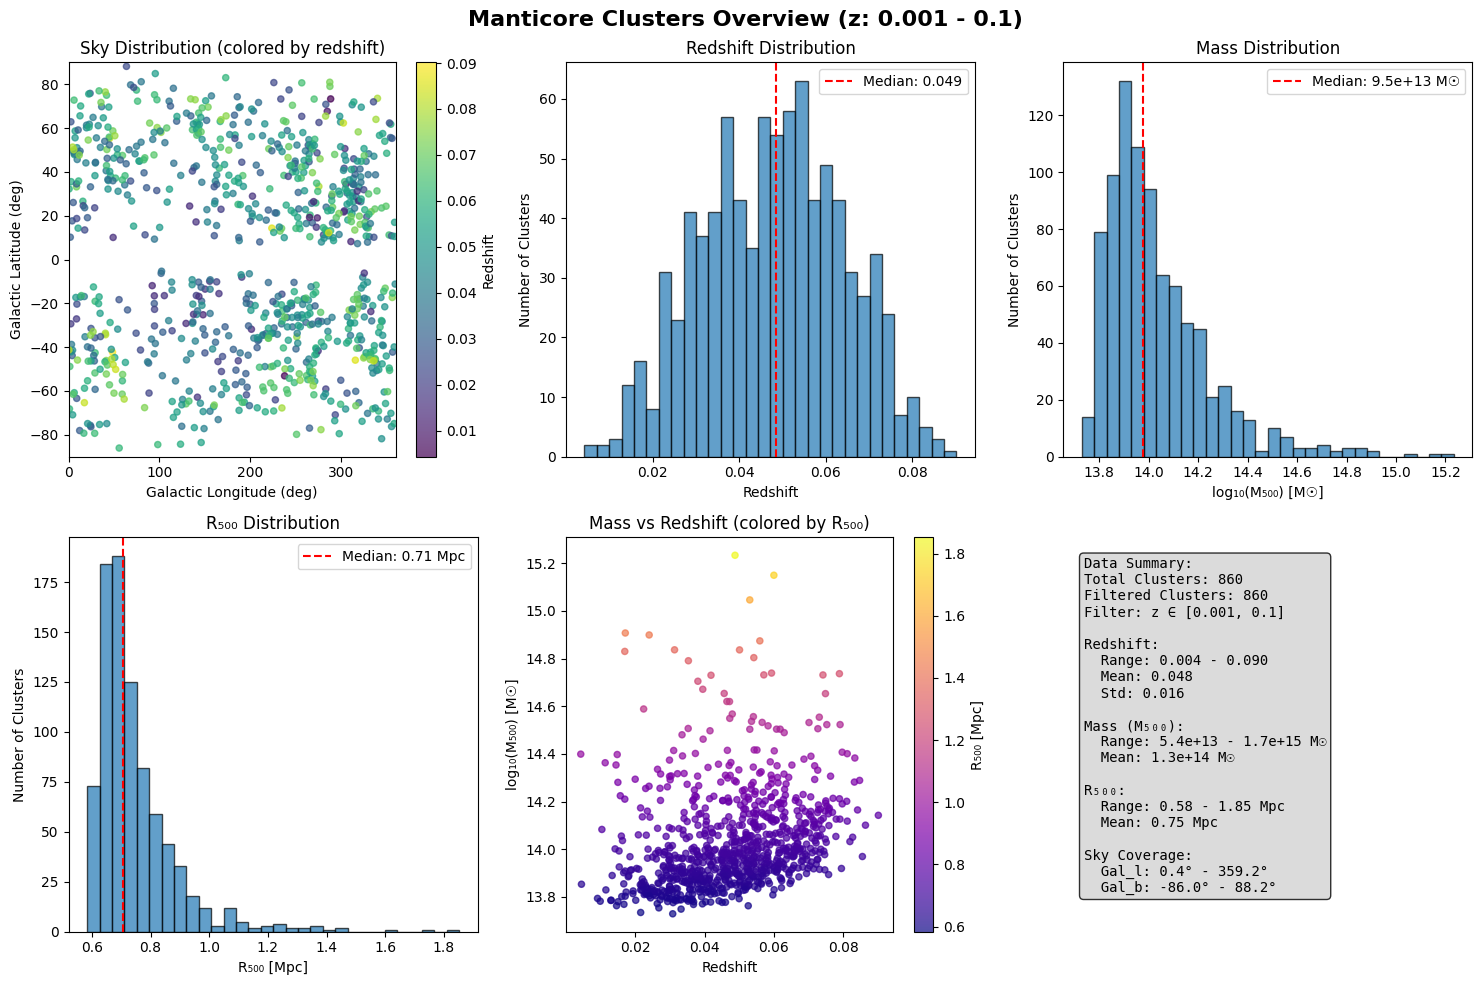

In [8]:
# plot_mcxc_overview(mcxc_data)  # Plot all data
plot_halo_overview(manticore_data, z_min=0.001, z_max=0.1, cat_name="Manticore")

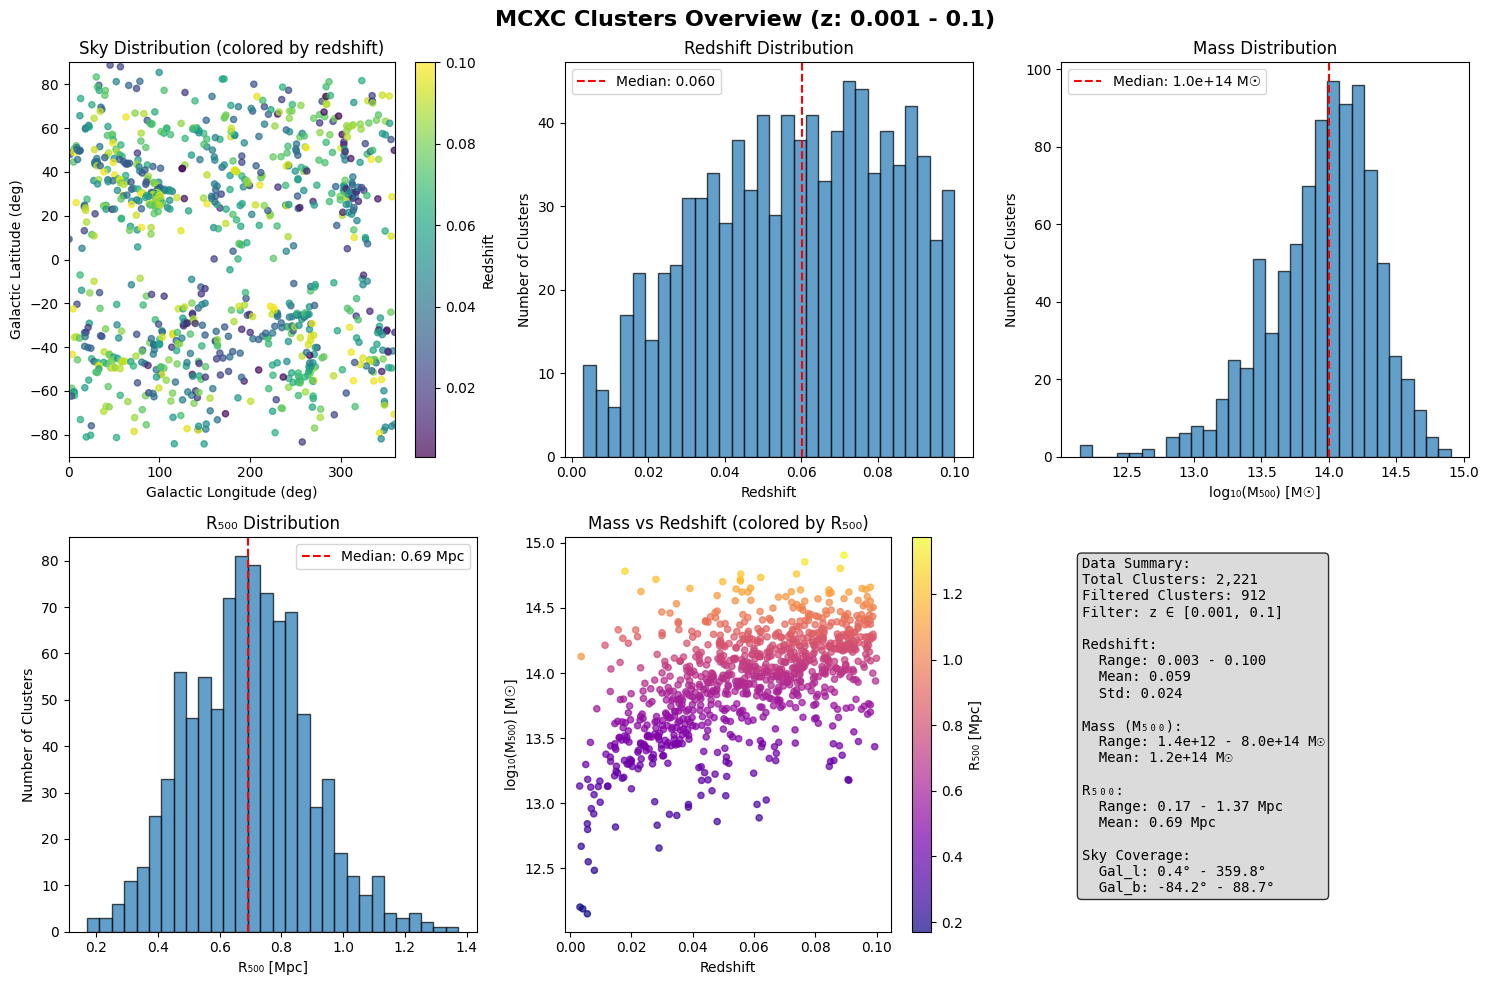

In [9]:
plot_halo_overview(mcxc_data, z_min=0.001, z_max=0.1, cat_name="MCXC")

/tmp/ipykernel_3054794/970405877.py:61: RuntimeWarning: invalid value encountered in log10
  ax3.hist(np.log10(filtered_data["m500"]), bins=30, alpha=0.7, edgecolor='black')
/tmp/ipykernel_3054794/970405877.py:81: RuntimeWarning: invalid value encountered in log10
  scatter2 = ax5.scatter(filtered_data["z"], np.log10(filtered_data["m500"]),


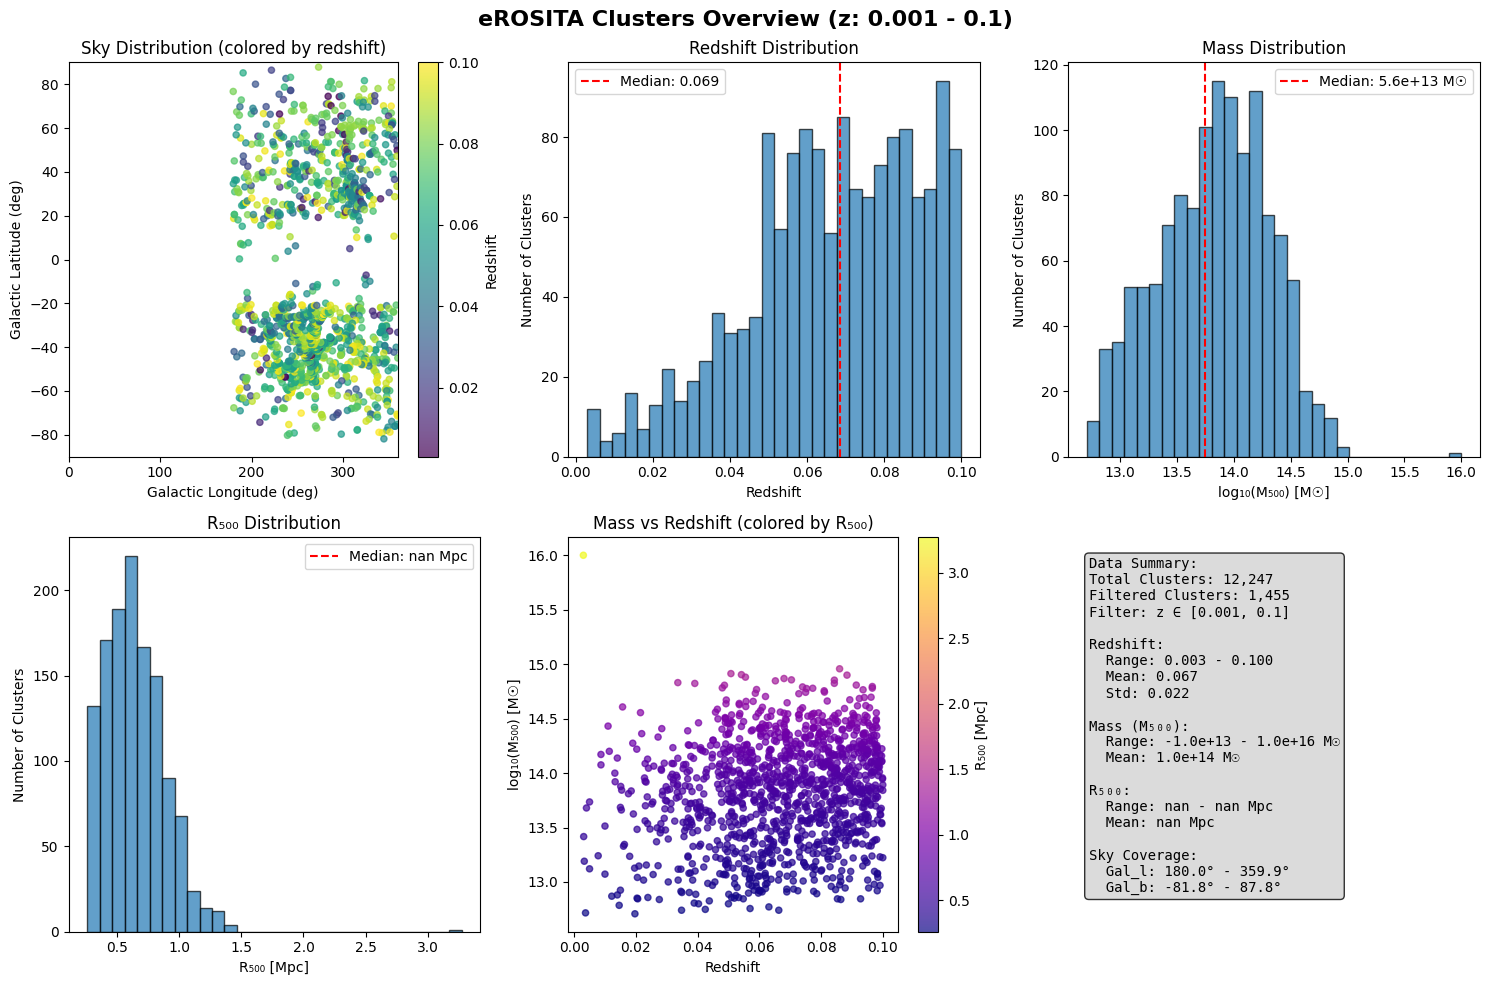

In [10]:
plot_halo_overview(eros_data, z_min=0.001, z_max=0.1, cat_name="eROSITA")

In [11]:
l_min = 20
l_max = 80

def generate_random_halos(n_halos):
    """Generate random positions for null test"""
    random_halos = []
    for i in range(n_halos):
        lon = np.random.uniform(0, 360)
        lat = np.random.uniform(-l_max, l_max)
        if abs(lat) > l_min:
            r200_deg = np.random.lognormal(np.log(1.0), 0.3)
            redshift = np.random.normal(0.05, 0.02)
            random_halos.append((lon, lat, r200_deg, max(0.01, redshift)))
    return random_halos


🔍 Processing MANTICORE dataset

📊 manticore - Mass bin: 8.0e+13-9.0e+13 M☉
🚀 CLUSTER ANALYSIS PIPELINE (Physical Scaling + Validation)

🔍 Step 1: Individual cluster measurements...
🔍 Calculating individual cluster measurements with individual R200...
   ✅ Calculated 35 valid measurements
   ❌ Rejected: 25 clusters
      - insufficient_mask_coverage: 25

🔄 Step 2: Bootstrap error estimation (100 samples)...

📚 Step 3: Stacking patches...
🔄 Stacking 35 patches...
✅ Using 32 valid patches
   Rejected: 3 (coverage), 0 (errors)
   Stack dimensions: (256, 256)
   Valid pixel range: 23-32 patches

📊 Step 5: Radial profile...
📊 Calculating radial profile...
   Radial bins: 30, Max radius: 10.0°
   Profile calculated: 30/30 valid bins

🎯 Final Results:
✅ Bootstrap statistics:
   Mean Δy: 5.78e-08
   Bootstrap error: 4.73e-08
   Detection significance: 1.2σ
   68% CI: [1.44e-08, 1.02e-07]

📏 Sample statistics:
   R200 median: 0.885°
   Sample: 35/60 clusters

🎉 Analysis complete with validation

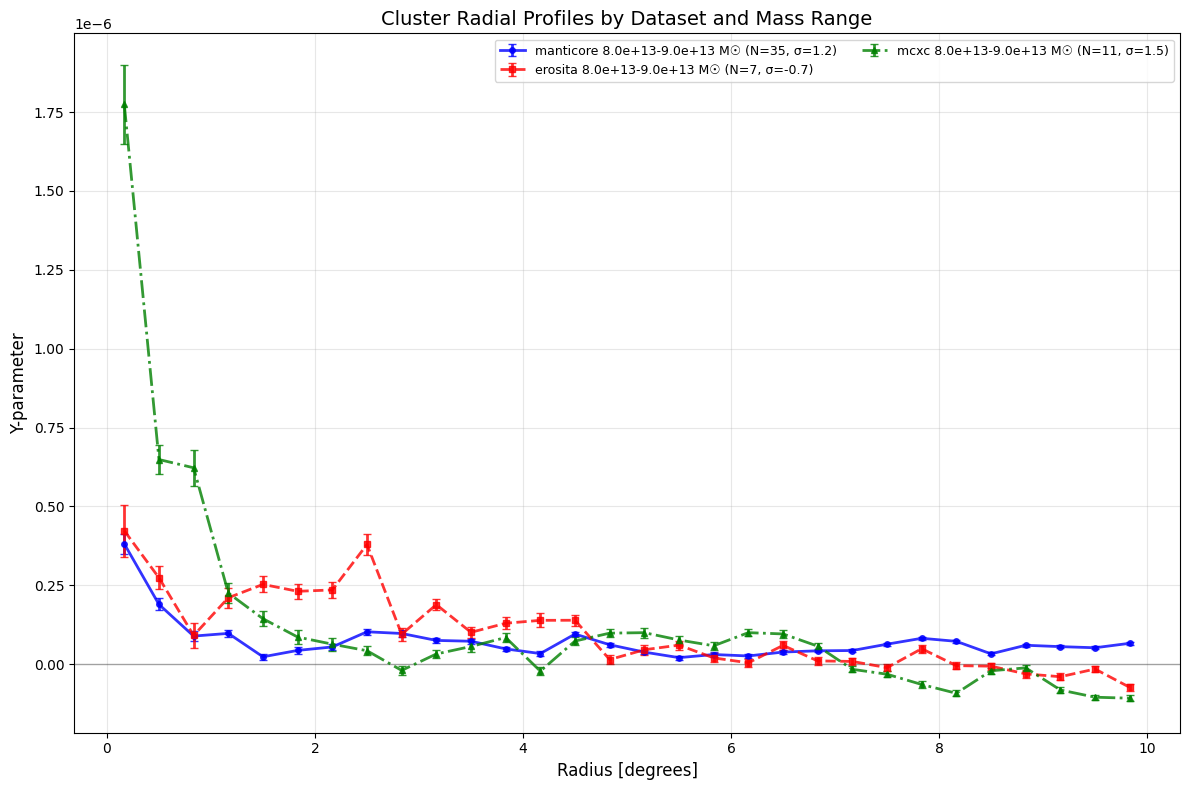

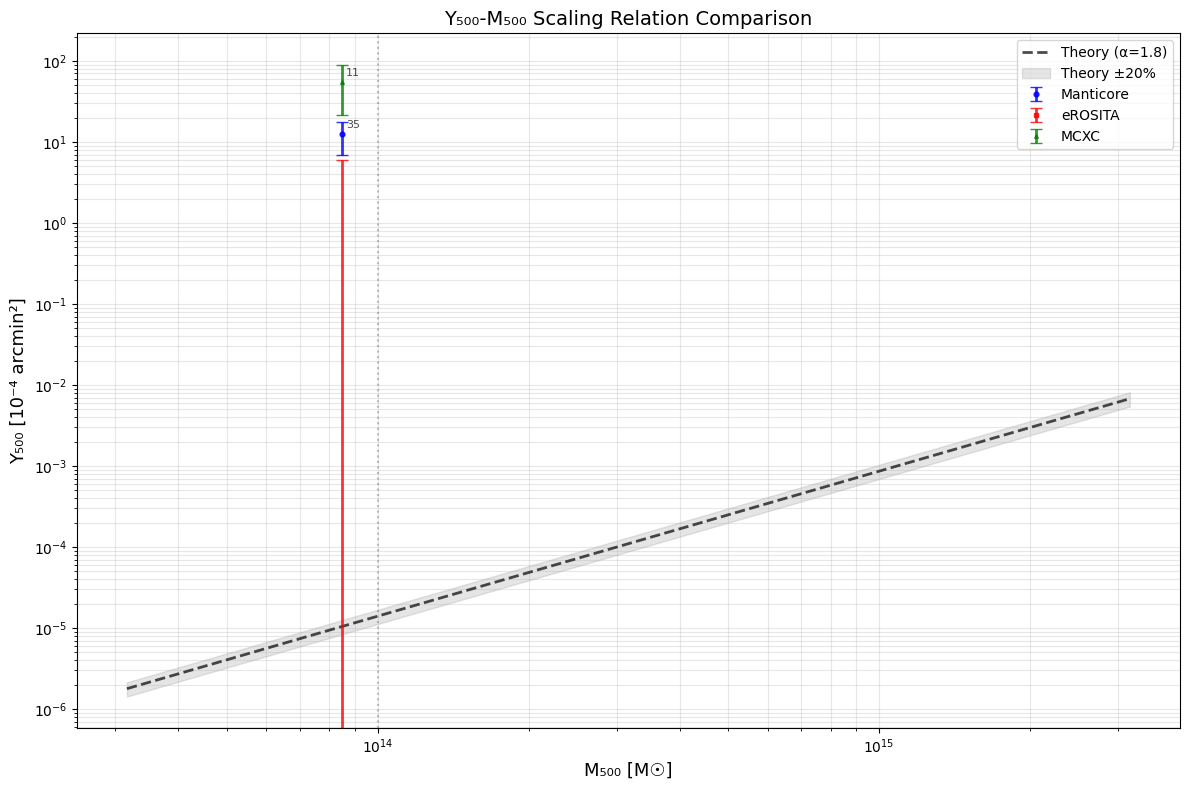

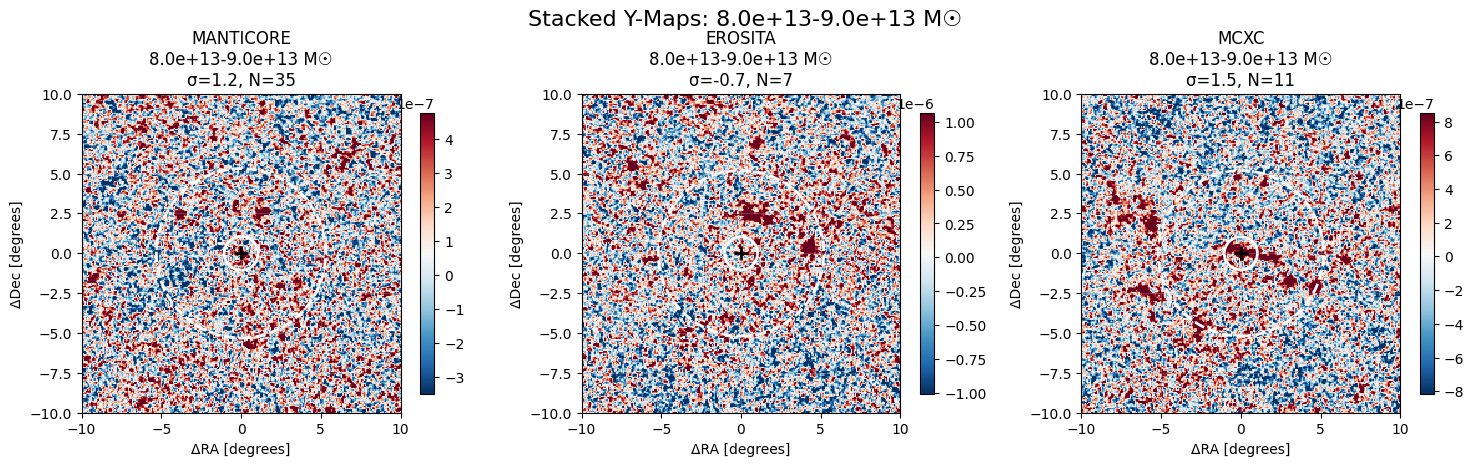

In [15]:
# Update the notebook cell in stack_patches.ipynb
# Bootstrap Methodology Validation Test
from stacking_backend.utils import mpc_to_angular_degrees
import numpy as np

# Single mass bin analysis
mass_bins = [
    (0.8e14, 0.9e14),
]

datasets = {
    'manticore': manticore_data,
    'erosita': eros_data,
    'mcxc': mcxc_data
}

inner_r200_factor=1.2
outer_r200_factor=6.0
patch_size_deg=20.0
npix=256
z_min = 0.005
z_max = 0.05
b_min = 10
b_max = 80

# Run original analysis for baseline
results_dict = {}

for dataset_name, which_data in datasets.items():
    print(f"\n🔍 Processing {dataset_name.upper()} dataset")
    results_dict[dataset_name] = {}
    
    mass_min, mass_max = mass_bins[0]
    mass_label = f"{mass_min:.1e}-{mass_max:.1e}"
    print(f"\n📊 {dataset_name} - Mass bin: {mass_label} M☉")

    # Build coordinate list with proper unit conversion
    coord_data = []
    for j in range(len(which_data["z"])):
        if (which_data['z'][j] > z_min and which_data['z'][j] < z_max 
            and np.abs(which_data['gal_b'][j]) > b_min and np.abs(which_data['gal_b'][j]) < b_max 
            and which_data['m500'][j] >= mass_min and which_data['m500'][j] <= mass_max):
            
            r500_mpc = which_data["r500"][j]
            z = which_data["z"][j]
            r500_deg = mpc_to_angular_degrees(r500_mpc, z)
            
            coord_data.append([which_data["gal_l"][j], which_data["gal_b"][j], r500_deg, z])
    
    coord_list = np.array(coord_data)

    if len(coord_list) == 0:
        print(f"   ⚠️ No clusters found in mass bin for {dataset_name}")
        continue

    try:
        results = pipeline.run_individual_r200_analysis_with_validation(
            coord_list=coord_list,
            inner_r200_factor=inner_r200_factor,
            outer_r200_factor=outer_r200_factor,
            patch_size_deg=patch_size_deg,
            npix=npix,
            min_coverage=0.8,
            n_radial_bins=30,
            run_null_tests=False,  # Skip null tests for this diagnostic
            n_bootstrap=100,  # Reduced for speed
            n_random=0
        )
        
        results['dataset'] = dataset_name
        results['mass_center'] = np.sqrt(mass_min * mass_max)
        results['mass_range'] = (mass_min, mass_max)
        results_dict[dataset_name][mass_label] = results
        
        print(f"   ✅ Baseline analysis: {results['significance']:.1f}σ from {results['n_measurements']} clusters")
        print(f"   Bootstrap error: {results['error_mean']:.2e}")
        
    except Exception as e:
        print(f"   ❌ Analysis failed for {dataset_name} {mass_label}: {e}")
        continue

# Multi-dataset radial profiles plot
fig1, ax1 = summary_plotter.plot_mass_range_profiles(results_dict)

# Y500-M500 scaling relation plot
fig2, ax2, fit_results = mass_plotter.plot_y_mass_scaling(
    results_dict, 
    title="Y₅₀₀-M₅₀₀ Scaling Relation Comparison",
    show_theory=True,
    fit_scaling=True
)

# Check fit results for all datasets
if fit_results:
    for dataset_name, results in fit_results.items():
        print(f"{dataset_name.upper()} - Fitted slope: {results['fitted_slope']:.2f}")
        print(f"{dataset_name.upper()} - Theory slope: {results['theory_slope']:.2f}")
        print(f"{dataset_name.upper()} - χ²/dof: {results['chi2']:.1f}/{results['dof']}")

# Side-by-side stacked patches for each mass bin across datasets
import matplotlib.pyplot as plt

for mass_label in mass_bins:
    mass_label_str = f"{mass_label[0]:.1e}-{mass_label[1]:.1e}"
    
    # Check which datasets have this mass bin
    available_datasets = []
    for dataset_name in ['manticore', 'erosita', 'mcxc']:
        if dataset_name in results_dict and mass_label_str in results_dict[dataset_name]:
            available_datasets.append(dataset_name)
    
    if not available_datasets:
        print(f"No data available for mass bin {mass_label_str}")
        continue
    
    n_datasets = len(available_datasets)
    fig, axes = plt.subplots(1, n_datasets, figsize=(5*n_datasets, 4.5))
    if n_datasets == 1:
        axes = [axes]
    
    for i, dataset_name in enumerate(available_datasets):
        results = results_dict[dataset_name][mass_label_str]
        
        inner_radius_deg = results['r200_median'] * inner_r200_factor
        outer_radius_deg = results['r200_median'] * outer_r200_factor
        
        stacked_patch = results['stacked_patch']
        patch_size_deg = results['patch_size_deg']
        
        if stacked_patch is not None:
            npix = stacked_patch.shape[0]
            extent = [-patch_size_deg/2, patch_size_deg/2, -patch_size_deg/2, patch_size_deg/2]
            
            # Calculate color limits
            finite_mask = np.isfinite(stacked_patch)
            if np.any(finite_mask):
                finite_data = stacked_patch[finite_mask]
                vmin, vmax = np.percentile(finite_data, [5, 95])
            else:
                vmin, vmax = -1e-6, 1e-6
            
            im = axes[i].imshow(stacked_patch, extent=extent, origin='lower',
                              cmap='RdBu_r', vmin=vmin, vmax=vmax, interpolation='nearest')
            
            # Center marker
            axes[i].plot(0, 0, 'k+', markersize=10, markeredgewidth=2)
            
            # Apertures
            circle_inner = plt.Circle((0, 0), inner_radius_deg, fill=False,
                                     color='white', linewidth=2, linestyle='-')
            circle_outer = plt.Circle((0, 0), outer_radius_deg, fill=False,
                                     color='white', linewidth=2, linestyle='--')
            axes[i].add_patch(circle_inner)
            axes[i].add_patch(circle_outer)
            
            axes[i].set_xlabel('ΔRA [degrees]')
            axes[i].set_ylabel('ΔDec [degrees]')
            axes[i].set_title(f'{dataset_name.upper()}\n{mass_label_str} M☉\nσ={results["significance"]:.1f}, N={results["n_measurements"]}')
            axes[i].grid(True, alpha=0.3)
            axes[i].set_aspect('equal')
            
            plt.colorbar(im, ax=axes[i], shrink=0.8)
    
    plt.suptitle(f'Stacked Y-Maps: {mass_label_str} M☉', fontsize=16)
    plt.tight_layout()
    plt.show()

In [ ]:
# Multi-dataset mass range profiles plot
fig1, ax1 = summary_plotter.plot_mass_range_profiles(results_dict)

In [ ]:
# Side-by-side stacked patches for each mass bin across datasets
import matplotlib.pyplot as plt

for mass_label in mass_bins:
    mass_label_str = f"{mass_label[0]:.1e}-{mass_label[1]:.1e}"
    
    # Check which datasets have this mass bin
    available_datasets = []
    for dataset_name in ['manticore', 'erosita', 'mcxc']:
        if dataset_name in results_dict and mass_label_str in results_dict[dataset_name]:
            available_datasets.append(dataset_name)
    
    if not available_datasets:
        print(f"No data available for mass bin {mass_label_str}")
        continue
    
    n_datasets = len(available_datasets)
    fig, axes = plt.subplots(1, n_datasets, figsize=(5*n_datasets, 4.5))
    if n_datasets == 1:
        axes = [axes]
    
    for i, dataset_name in enumerate(available_datasets):
        results = results_dict[dataset_name][mass_label_str]
        
        inner_radius_deg = results['r200_median'] * inner_r200_factor
        outer_radius_deg = results['r200_median'] * outer_r200_factor
        
        stacked_patch = results['stacked_patch']
        patch_size_deg = results['patch_size_deg']
        
        if stacked_patch is not None:
            npix = stacked_patch.shape[0]
            extent = [-patch_size_deg/2, patch_size_deg/2, -patch_size_deg/2, patch_size_deg/2]
            
            # Calculate color limits
            finite_mask = np.isfinite(stacked_patch)
            if np.any(finite_mask):
                finite_data = stacked_patch[finite_mask]
                vmin, vmax = np.percentile(finite_data, [5, 95])
            else:
                vmin, vmax = -1e-6, 1e-6
            
            im = axes[i].imshow(stacked_patch, extent=extent, origin='lower',
                              cmap='RdBu_r', vmin=vmin, vmax=vmax, interpolation='nearest')
            
            # Center marker
            axes[i].plot(0, 0, 'k+', markersize=10, markeredgewidth=2)
            
            # Apertures
            circle_inner = plt.Circle((0, 0), inner_radius_deg, fill=False,
                                     color='white', linewidth=2, linestyle='-')
            circle_outer = plt.Circle((0, 0), outer_radius_deg, fill=False,
                                     color='white', linewidth=2, linestyle='--')
            axes[i].add_patch(circle_inner)
            axes[i].add_patch(circle_outer)
            
            axes[i].set_xlabel('ΔRA [degrees]')
            axes[i].set_ylabel('ΔDec [degrees]')
            axes[i].set_title(f'{dataset_name.upper()}\n{mass_label_str} M☉\nσ={results["significance"]:.1f}, N={results["n_measurements"]}')
            axes[i].grid(True, alpha=0.3)
            axes[i].set_aspect('equal')
            
            plt.colorbar(im, ax=axes[i], shrink=0.8)
    
    plt.suptitle(f'Stacked Y-Maps: {mass_label_str} M☉', fontsize=16)
    plt.tight_layout()
    plt.show()

In [ ]:
# Multi-dataset scaling relation plot
fig, ax, fit_results = mass_plotter.plot_y_mass_scaling(
    results_dict, 
    title="kSZ Detection: Y-M Scaling Comparison",
    show_theory=True,
    fit_scaling=True
)

# Check fit results for all datasets
if fit_results:
    for dataset_name, results in fit_results.items():
        print(f"{dataset_name.upper()} - Fitted slope: {results['fitted_slope']:.2f}")
        print(f"{dataset_name.upper()} - Theory slope: {results['theory_slope']:.2f}")
        print(f"{dataset_name.upper()} - χ²/dof: {results['chi2']:.1f}/{results['dof']}")